Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib
y[8:13], x[8:13] = [48 48 49 49 49] [145 154 147 148 154]
y[8:13], x[8:13] = [48 48 49 49 49] [145 154 147 148 154]


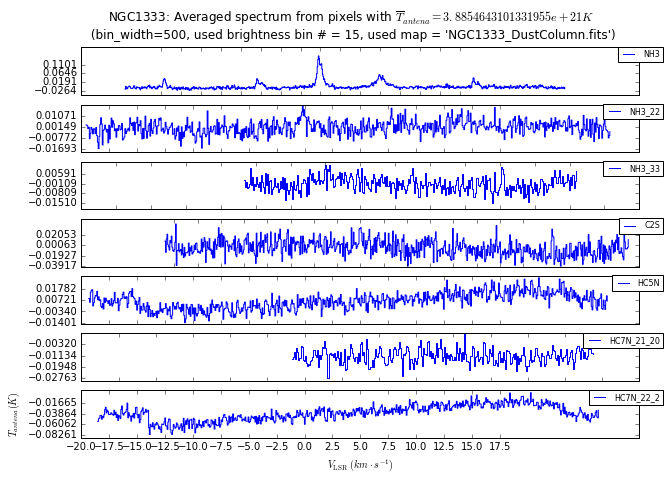

y[8:13], x[8:13] = [126 126 126 126 127] [ 98  99 100 101  97]
Nchan = 34
error_bar = 0.0348864731589
Nchan = 24
error_bar = 0.0293105001399
Nchan = 24
error_bar = 0.0293105001399
Nchan = 34
error_bar = 0.0348864731589
Nchan = 28
error_bar = 0.0316589585245
Nchan = 55
error_bar = 0.0474904145952
Nchan = 56
error_bar = 0.0485494513744
Nchan = 52
error_bar = 0.143158148093
Nchan = 56
error_bar = 0.0363401480567
Nchan = 55
error_bar = 0.0443578073421
Nchan = 57
error_bar = 0.0627797803312
row = ['NGC1333_DustColumn.fits', 500, 0, 2.8628562976920627e+22, 6.470397500565699, 0.031658958524515939, 0.7017444220692758, 0.047490414595171677, 0.08182954126379102, 0.048549451374449472, 0.11570489948239142, 0.14315814809342439, 0.023659298537605882, 0.036340148056707829, -0.4113953853880863, 0.044357807342124571, -0.3413746108829776, 0.062779780331177384]
y[8:13], x[8:13] = [89 90 90 90 90] [143 137 138 139 140]
Nchan = 35
error_bar = 0.0446751783934
Nchan = 24
error_bar = 0.0369945623601
Nchan = 2

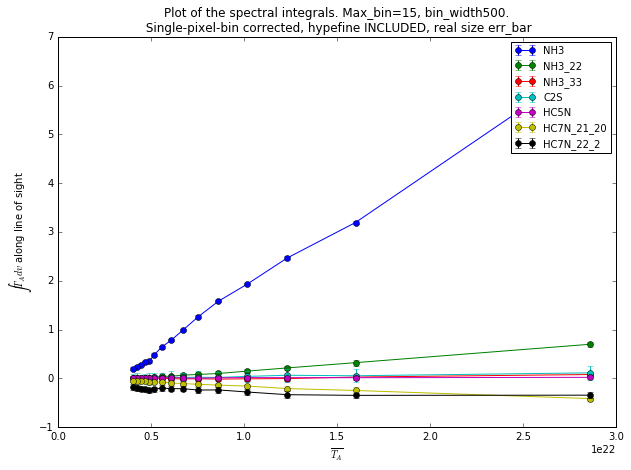

map,bin width,bin#,T_med,NH3,NH3_err,NH3_22,NH3_22_err,NH3_33,NH3_33_err,C2S,C2S_err,HC5N,HC5N_err,HC7N_21_20,HC7N_21_20_err,HC7N_22_2,HC7N_22_2_err
str30,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
NGC1333_DustColumn.fits,500.0,0.0,2.86285629769e+22,6.47039750057,0.0316589585245,0.701744422069,0.0474904145952,0.0818295412638,0.0485494513744,0.115704899482,0.143158148093,0.0236592985376,0.0363401480567,-0.411395385388,0.0443578073421,-0.341374610883,0.0627797803312
NGC1333_DustColumn.fits,500.0,1.0,1.599787156e+22,3.19502644962,0.0399586943178,0.324593766936,0.0638059151333,0.0298039866106,0.054173064134,0.056271351965,0.133132659459,0.0162636401982,0.0532267351731,-0.245326137097,0.0619273802458,-0.345386652454,0.0534246129417
NGC1333_DustColumn.fits,500.0,2.0,1.23169404654e+22,2.46647126278,0.0383748034091,0.216325389041,0.0471313573709,-0.00108821521546,0.044175816102,0.0663623374804,0.135187545829,0.0169560784434,0.0339993354317,-0.205783776734,0.0469162447267,-0.331326973576,0.0763375950574
NGC1333_DustColumn.fits,500.0,3.0,1.01853459383e+22,1.93511690592,0.0299320341662,0.151555257776,0.0442983332818,-0.00671971599002,0.0456303533088,0.0434967845164,0.117395164114,0.0185101914693,0.0416609660642,-0.155526892704,0.0329028098468,-0.276750109888,0.0582598253222
NGC1333_DustColumn.fits,500.0,4.0,8.61964092584e+21,1.5811967499,0.0230773471412,0.102441252687,0.0504337078843,-0.0117354518238,0.0420162190897,0.0221390495443,0.111746832383,0.0148527073792,0.0295677721884,-0.135537566304,0.0301187857256,-0.233539241613,0.0563570583643
NGC1333_DustColumn.fits,500.0,5.0,7.5445396335e+21,1.26606044229,0.0286441600583,0.0832898695796,0.0320638703299,-0.00547108894051,0.0484620861243,0.0245563126574,0.123442197675,0.00470104661216,0.0333464072329,-0.118337060397,0.0346427090059,-0.23626816004,0.0525339467777
NGC1333_DustColumn.fits,500.0,6.0,6.73473729241e+21,0.995656628788,0.0274602733359,0.0694089092998,0.0518538284098,-0.00814825336678,0.0426137275733,0.0233959946313,0.0798395402745,0.0107817988267,0.0479748583537,-0.10475514748,0.0342994044866,-0.209133079282,0.0522997347144
NGC1333_DustColumn.fits,500.0,7.0,6.08830110328e+21,0.785251126561,0.0235367700086,0.0463159205175,0.0330793128121,-0.00377301891261,0.0389664711696,0.0278910366909,0.115947154455,0.01938818265,0.0390342880788,-0.0914570212646,0.0319437979088,-0.207368159247,0.0524198099354
NGC1333_DustColumn.fits,500.0,8.0,5.57731414487e+21,0.641401930881,0.0291540212706,0.0418649840177,0.0378088445054,0.00390064893614,0.0393989155142,0.0179257725612,0.0998789368027,0.0170484791479,0.0351029764953,-0.0748279736301,0.0262629933123,-0.195700785514,0.0551396710983


In [6]:
# What are the variables we want set as default?
# Taking out the user input leaves much less comparison options? what do we want to compare actually?
# Now bin_width=500, wanted_bin=0 occure as kew words in main() and in binning() function. Is this OK?
# Do we want to have global variable declarations in the header?


import GAS
from spectral_cube import SpectralCube
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import astropy.units as u
from astropy.io import fits
from astropy.table import Table

%pylab
%matplotlib inline

vlsr = fits.getdata('NGC1333_Vlsr_v1.fits')
files =['NGC1333_NH3_11_DR1.fits', 'NGC1333_NH3_22_DR1.fits', 'NGC1333_NH3_33_DR1.fits', 
       'NGC1333_C2S_DR1.fits',
       'NGC1333_HC5N_DR1.fits',
        'NGC1333_HC7N_21_20_DR1.fits', 'NGC1333_HC7N_22_21_DR1.fits']
lines_margins = {files[0]: [[-1.25, 1.25],[-8.75, -7.],[7.0,8.75], [-20.5,-18.], [18.5, 20.5]], files[1]: [[-2, 2]], files[2]: [[-2, 2]], files[3]: [[-2, 2]], files[4]: [[-2, 2]],
                    files[5]: [[-2, 2]], files[6]: [[-2, 2]]}
noise_margins = {files[0]: [-12, -10], files[1]: [-12, -10], files[2]: [-4, -2], files[3]: [-12, -10], files[4]: [-12, -10],
                    files[5]: [-4, -2], files[6]: [-12, -10]}

bin_width = 500
this_bin = 15
# map_name = 'NGC1333_Temperature.fits'
map_name = 'NGC1333_DustColumn.fits'

def main(this_bin, bin_width):   
    # This is the main routine.
    y, x, med = binning(map_name, bin_width, this_bin)
    
    plot_spectra(this_bin, bin_width)
    t, table_names = make_table(files, map_name, this_bin, bin_width, y, x)
    plot_table(files, map_name, this_bin, bin_width, y, x)
    return t

def plot_spectra(this_bin, bin_width):
    loop_count = 0
    fig = plt.figure(figsize=(10,7))
    # for plotting plots in a single figure put plt.figure before all the .plot commands
    # otherwise you will get the plots in a different figures
    
    y, x, med = binning(map_name, bin_width, this_bin)
    # This takes in a 2D map and returns a 2D map where the image values are the bin to which a pixel belongs.
    
    for file_name in files:            
        sp_av, cube = averaging(file_name, y, x)
        thiscube_spectrum_dv, cube, offset_velocity = averaging_over_dopplervel(file_name, y, x)
        #Change to velocity axis and such here as well.  Then average all spectra with that bin label.
        ax = fig.add_subplot(len(files),1,loop_count+1)
        plt.plot(offset_velocity,thiscube_spectrum_dv, drawstyle='steps')
        plt.yticks(np.arange(min(thiscube_spectrum_dv), max(thiscube_spectrum_dv), (max(thiscube_spectrum_dv)-min(thiscube_spectrum_dv))/4)) 
        plt.xticks(np.arange(-20, 20, 2.5)) 
    
        if file_name != files[-1]:
            plt.setp(ax.get_xticklabels(), visible=False)

        file_name = file_name.strip('L1455_').strip('_all.fits').strip('NGC1333').strip('_DR1_all.fits')
        plt.legend([file_name], bbox_to_anchor=(1.05, 1.1), prop={'size':8})
        
        loop_count += 1        

#     plt.legend(leg, loc = 5, prop={'size':8})
#     ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
#     fig.legend(curves_names, leg, bbox_to_anchor=(0.5, -0.15))
#     figtext(.1,.0,'averaging over brightness, with doppler v correction, thisbin=2' , fontsize=8)
#     fig.suptitle("averaging over brightness with brightnes bin = %r for bin width = %r" %(this_bin, bin_width), fontsize=12)
    fig.suptitle("NGC1333: Averaged spectrum from pixels with $\overline{T}_{antena} = %rK$ \n (bin_width=%r, used brightness bin # = %r, used map = %r)"
                 %(med, bin_width, this_bin, map_name), fontsize=12)
    plt.ylabel(r'$T_{antena} (K)$')
    plt.xlabel(r'$V_{\mathrm{LSR}}\ (km \cdot s^{-1})$')
#     plt.savefig("L1455:BinsAveraging_NH3map_bin_width=%rthis_bin=%r.png" %(bin_width, this_bin))
    plt.show()

      
def binning(f_nam, bin_width, this_bin):
    """A function creating brightness bins of pixels, and eventualy a map, in the given spectral cube"""
#     cube = SpectralCube.read(f_nam)
#     cube = cube.with_spectral_unit(u.km/u.s,velocity_convention='radio')
#     Tmax = cube.apply_numpy_function(np.nanmax,axis=0) # array of the maximum values in the spectra of each pixel
#     baddata = nd.morphology.binary_dilation(np.isnan(Tmax),np.ones((25,25)))
#     Tmax[baddata]=0.0
#     Tmax[np.isfinite(Tmax)]
    
    Tmax = fits.getdata(map_name)
    bin_arr = np.sort(Tmax[np.isfinite(Tmax)])
    bin_arr2 = bin_arr[:: - bin_width] # this creates an array of the bin margins, in which every bin has a width of "bin_width"  
    bins = np.digitize(Tmax,bin_arr2)
#     print 'old bins =', bins
    bins = [x-1 for x in bins] # this and the following line correct the fact that there is otherwise
    bins = np.array(bins) # only one pixel in the bin = 0
#     print type(bins)
#     print 'bins =', bins
    y, x = np.where(bins==this_bin)
    print 'y[8:13], x[8:13] =', y[8:13], x[8:13]
    med = round(np.median(Tmax[y,x]), 2)
#     print 'med in binning():', med
    return y, x, med

def averaging(file_name, y, x):
    cube = SpectralCube.read(file_name)
    cube = cube.with_spectral_unit(u.km/u.s,velocity_convention='radio')
    sp_av = np.nanmean(cube.filled_data[:,y,x].value,axis=1)
    return sp_av, cube

def averaging_over_dopplervel(file_name, y, x):
    cube = SpectralCube.read(file_name)
    cube = cube.with_spectral_unit(u.km/u.s,velocity_convention='radio')
    sp_av = np.nanmean(cube.filled_data[:,y,x].value,axis=1)
    thiscube_spectrum_dv, offset_velocity = GAS.gasBinning.BinByMask(cube, CentroidMap = vlsr, x = x, y = y)
    return thiscube_spectrum_dv, cube, offset_velocity


def make_table(files, map_name, this_bin, bin_width, y, x):
    # approach: first loop - make all the columns, with names. First columns will contain all the same data,
    # last ones would be empty.
    # second loop - append all the rows with the data
    
    # Or, create an empty tables. Then create in a loop all the rows. At the end of the loop add the rows
    # to the table. Then just add region, map and bin_width
    # in the title
        
#     table_names = ['map', 'bin width', 'bin#', 'T_med'] + [f.strip('NGC1333').strip('_DR1_all.fits') for f in files]
    table_names = ['map', 'bin width', 'bin#', 'T_med']
    for f in files:
        table_names.append(f.strip('NGC1333').strip('_DR1_all.fits'))
        table_names.append(f.strip('NGC1333').strip('_DR1_all.fits')+'_err')
        
    arr = np.arange(len(table_names)*this_bin).reshape(this_bin, len(table_names))    
    t = Table(arr, names=table_names, meta={'name': 'table'}, dtype=['S30'] + (len(table_names)-1)*['f8'])    
    for bin_num in range(this_bin):
        y, x, med = binning(map_name, bin_width, bin_num)
        row = [map_name, bin_width, bin_num, med]
        for file_name in files:
            thiscube_spectrum_dv, cube, offset_velocity = averaging_over_dopplervel(file_name, y, x)
            sp_integral, error_bar = spectral_integral_and_err(offset_velocity, thiscube_spectrum_dv, cube, file_name, lines_margins)
            row.append(sp_integral)
            row.append(error_bar)
        print 'row =', row
        t[bin_num] = row
    
#     t.write('filename.txt', format='latex') # - COOL!!!
#     t.write('NGC1333_bin_width=%r_MaxBin#=%r_no_header.txt' %(bin_width, this_bin), format='ascii.no_header')
    t.write('Table_spec_integrals_corrected_bin_width=%r_MaxBin#=%r_HYPERFINE.txt' %(bin_width, this_bin), format='ascii.fixed_width')
    return t, table_names


def plot_table(files, map_name, this_bin, bin_width, y, x):
    t, table_names = make_table(files, map_name, this_bin, bin_width, y, x)
    fig = plt.figure(figsize=(10,7))
    ax1 = fig.add_subplot(111)
    ax1.set_title("Plot of the spectral integrals. Max_bin=%r, bin_width%r.\n Single-pixel-bin corrected, hypefine INCLUDED, real size err_bar"%(this_bin, bin_width))    
    ax1.set_xlabel('$\overline{T_A}$')
    ax1.set_ylabel('$\int T_A dv$ along line of sight')    
#     y_error = [0.3, 0.3, 0.3, 0.3]
    
    print "t['T_med']=", t['T_med']
    for file_name in files:
        column_name = file_name.strip('NGC1333').strip('_DR1_all.fits') 
        ax1.errorbar(t['T_med'], t[column_name], yerr=t[column_name+'_err'], marker='o', linestyle='-', label=str(column_name))
        
        
    leg = ax1.legend(prop={'size':10})
    
#     plt.errorbar(t['T_med'], t[column_name], yerr=y_error)
    plt.savefig("NGC1333:SpeclInteg_CORRECTED_bin_width=%rthis_bin=%r_HYPERFINE.png" %(bin_width, this_bin))
    plt.show()
    
    
def spectral_integral_and_err(offset_velocity, thiscube_spectrum_dv, cube, file_name, lines_margins):
    # first, calculating the integral
    if lines_margins[file_name] == None:
        return 0, 0
    else:
        # in line below calculating the spectral-bin-width, assuming that all spectral-bins have the same width
        spec_bin_w = (cube.spectral_axis[1] - cube.spectral_axis[2])
        sp_integral = 0
        for line_interval in lines_margins[file_name]:
            ind_line = (line_interval[0] < offset_velocity) & (offset_velocity < line_interval[1])
            sp_integral += np.nansum(thiscube_spectrum_dv[ind_line]) * spec_bin_w
    
    # below calculating the error, based on the standard deviation of the signal noise
            ind_offset = (noise_margins[file_name][0] < offset_velocity) & (offset_velocity < noise_margins[file_name][1])
            std_noise = np.nanstd(thiscube_spectrum_dv[ind_offset])
            # Nchan should be the # of channels, that contribute to the integral (= # of data points in spectral line)
            Nchan = len(thiscube_spectrum_dv[ind_line])
            print 'Nchan =', Nchan
            error = std_noise*np.sqrt(Nchan)
            print 'error_bar =', error
     
    return sp_integral.value, error
    
t = main(this_bin, bin_width)
t

In [7]:
import GAS
from spectral_cube import SpectralCube
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import astropy.units as u
from astropy.io import fits
from astropy.table import Table

# Tmax = fits.getdata('NGC1333_DustColumn.fits')
# bin_arr = np.sort(Tmax[np.isfinite(Tmax)])
# bin_arr2 = bin_arr[:: - bin_width] # this creates an array of the bin margins, in which every bin has a width of "bin_width"  
# bins = np.digitize(Tmax,bin_arr2)
# y, x = np.where(bins==this_bin)

array = range(34)
bin_array = array[-2:: -4]
bins_2 = np.digitize(array,bin_array)
bins_3 = np.delete(bins_2,-1)
# print 'bins_3 =', bins_3
print type(bins_2)
print type(array)
print bins_2[1]

print 'array, bin_array, bins_2:',array, bin_array, bins_2

<type 'numpy.ndarray'>
<type 'list'>
8
array, bin_array, bins_2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] [32, 28, 24, 20, 16, 12, 8, 4, 0] [8 8 8 8 7 7 7 7 6 6 6 6 5 5 5 5 4 4 4 4 3 3 3 3 2 2 2 2 1 1 1 1 0 0]


In [8]:
a = np.array([1,2,3,4,5,6,7,8,9])
print 'type(a) =',type(a)
b = np.array(a)
print 'type(b) =',type(b)


type(a) = <type 'numpy.ndarray'>
type(b) = <type 'numpy.ndarray'>


In [20]:
x = np.arange(9.).reshape(3, 3)
x = np.array([0, 7, 19, 1, 2, 5, 2, 3, 4])
# x
np.where((2 < x) & (x < 5))

(array([7, 8]),)

In [53]:
a = {'these': None, 'this': 4, 'that': 8}
for key in a:
    if a[key] == None:
        continue
    print 'key is', a[key]
        

key is 4
key is 8


In [8]:
files =['NGC1333_NH3_11_DR1.fits', 'NGC1333_NH3_22_DR1.fits', 'NGC1333_NH3_33_DR1.fits', 
       'NGC1333_C2S_DR1.fits',
       'NGC1333_HC5N_DR1.fits',
        'NGC1333_HC7N_21_20_DR1.fits', 'NGC1333_HC7N_22_21_DR1.fits']
bin_width = 500
noise_margins = {files[0]: [-15, -10], files[1]: None, files[2]: None, files[3]: None, files[4]: None,
                    files[5]: None, files[6]: None}


def std_noise2(noise_margins, file_name):
    if noise_margins[file_name] == None:
        return 0    
    else:
#         thiscube_spectrum_dv, cube, offset_velocity = averaging_over_dopplervel(file_name, y, x)
#         print 'noise_margins[file_name][0] =',noise_margins[file_name][0]
#         ind = np.where((noise_margins[file_name][0] < offset_velocity) & (offset_velocity < noise_margins[file_name][1]))
#         std_noise = np.nanstd(thiscube_spectrum_dv[ind])
        return 1
    
z = std_noise2(noise_margins, 'NGC1333_NH3_11_DR1.fits')
z

1

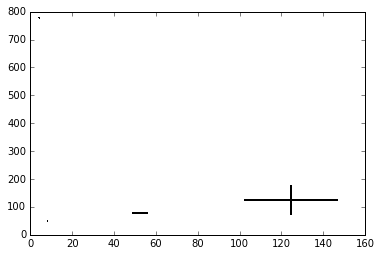

In [23]:
import matplotlib.pyplot as plt

x = [124.46, 8.20, 52.55, 4.33]
y = [124.46, 50.2, 78.3, 778.8]
xerr = [54.2, 0.1, 2.41, 1.78]
yerr = [22.55, 0.37, 3.77, 0.14]

plt.errorbar(x, y, xerr, yerr, capsize=0, ls='none', color='black', 
            elinewidth=2)

plt.show()

<Container object of 3 artists>

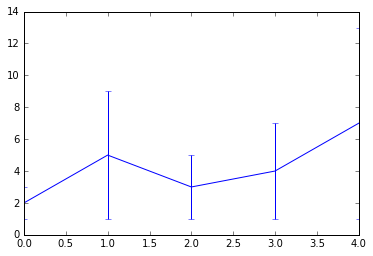

In [33]:
import numpy as np
import matplotlib.pyplot as plt

plt.errorbar(xrange(5), [2,5,3,4,7], yerr=[1,4,2,3,6])

In [31]:
import GAS
from spectral_cube import SpectralCube
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import astropy.units as u
from astropy.io import fits
from astropy.table import Table

# a = [[5, 4, 7], [5, 4, 8]]
# a1 = [arr[0] for arr in np.array(a)]
# print 'a1 =', a1
# b = np.array([6, 5, 9])
# c = b - a
# print 'c =', c

# m = np.array((1, 3, 10, 5))
# a = 6
# m2 = m < a
# print 'm2 =', m2
# m3 = m - m2
# print 'm3 =', m3

# file_name = 'NGC1333_NH3_11_DR1.fits'
# print '[arr[0] for arr in np.array(lines_margins[file_name])] =', [np.abs(arr[0]-arr[1]) for arr in np.array(lines_margins[file_name])]
# widths_of_all_lines = [arr[0] for arr in np.array(lines_margins[file_name])] - [arr[1] for arr in np.array(lines_margins[file_name])]
# sum_line_widths = np.sum(widths_of_all_lines)


# np.sum([[0, 1], [0, 5]], axis=0)
# array([0, 6])


# this_lines_margins = np.array(lines_margins[file_name]))
# # np.sum()

a = [[-4, -1], [-1,1], [1,7]]
widths = [np.abs(arr[0]-arr[1]) for arr in a]
widths
b = sum(widths)
b

11

In [23]:
    
print table_names

['map', 'bin width', 'bin#', 'T_med', 'NH3', 'NH3_err', 'NH3_22', 'NH3_22_err', 'NH3_33', 'NH3_33_err', 'C2S', 'C2S_err', 'HC5N', 'HC5N_err', 'HC7N_21_20', 'HC7N_21_20_err', 'HC7N_22_2', 'HC7N_22_2_err']
